In [1]:
import math
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import numpy as np
import pandas as pd
import time
import os
import glob

## 1: compare for different timesteps (Bulirsch-Stoer)

In [2]:
folder = "slopes"
files = ["0.125_day_timestep_slopes.csv", "0.25_day_timestep_slopes.csv", "0.5_day_timestep_slopes.csv", "1_day_timestep_slopes.csv", "2.5_day_timestep_slopes.csv"]
x_axis = [0.125, 0.25, 0.5, 1, 2.5]
bodies = ['sun', 'earth', 'jupiter', 'saturn', 'neptune', 'uranus', 'venus', 'mars', 'mercury']

5
sun
earth
jupiter
saturn
neptune
uranus
venus
mars
mercury


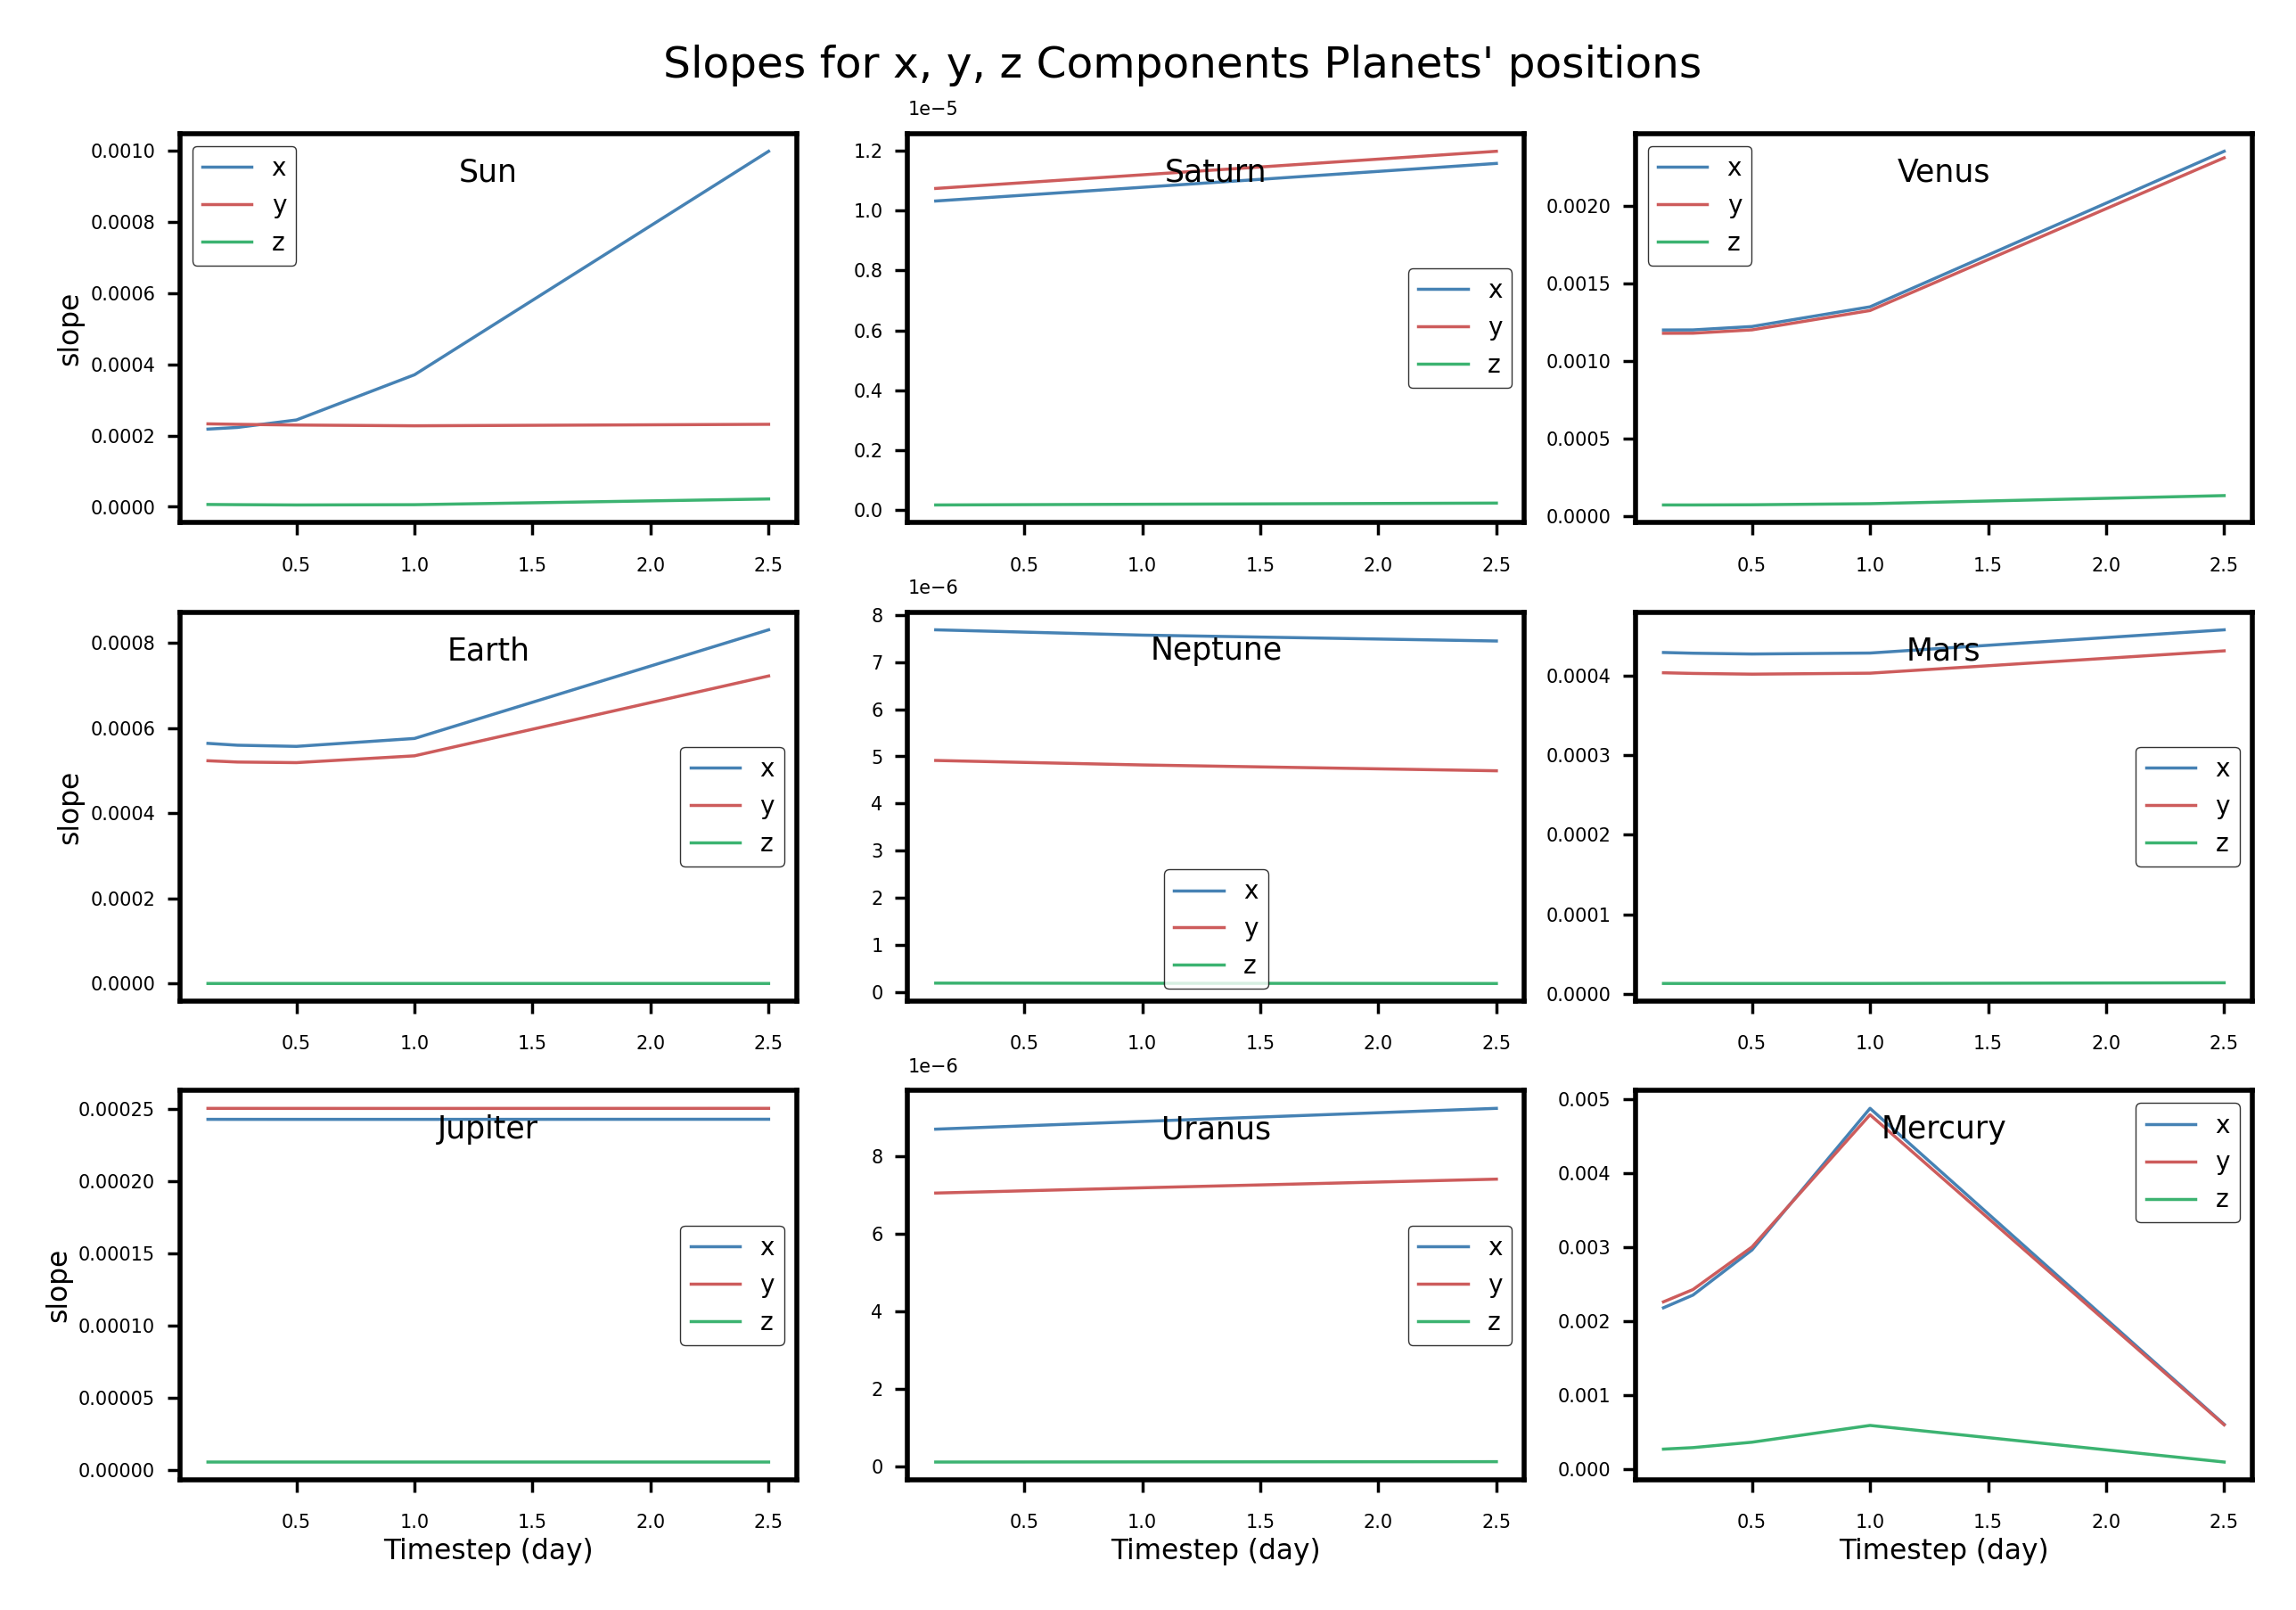

In [3]:
datasets = []
for file in files:
    df = pd.read_csv(folder + "/%s"%(file))
    datasets.append(df)
print(len(datasets))

figure, ax = plt.subplots(3, 3)
figure.set_dpi(500)
plt.ticklabel_format(useOffset=False)
i_h = [0, 1, 2, 0, 1, 2, 0, 1, 2]
i_v = [0, 0, 0, 1, 1, 1, 2, 2, 2]

for ind in range(len(bodies)):
    body = bodies[ind]
    print(body)
    
    slopes_x = []
    slopes_y = []
    slopes_z = []
    
    for dataset in datasets:
        row = list(dataset.loc[ind])
#         print(row)
        slopes_x.append(row[1])
        slopes_y.append(row[2])
        slopes_z.append(row[3])
    
    ax[i_h[ind]][i_v[ind]].plot(x_axis, slopes_x, label = 'x', linewidth = 0.5, c = "steelblue")
    ax[i_h[ind]][i_v[ind]].plot(x_axis, slopes_y, label = 'y', linewidth = 0.5, c = "indianred")
    ax[i_h[ind]][i_v[ind]].plot(x_axis, slopes_z, label = 'z', linewidth = 0.5, c = "mediumseagreen")
    leg = ax[i_h[ind]][i_v[ind]].legend(fontsize="4")
    leg.get_frame().set_linewidth(0.2)
    leg.get_frame().set_edgecolor('k')

    if i_h[ind] == 2:
        ax[i_h[ind]][i_v[ind]].set_xlabel("Timestep (day)", fontsize=4.5, labelpad=1)
    
    # ax[i_h[ind]][i_v[ind]].yaxis.offsetText.set_visible(False)

    ax[i_h[ind]][i_v[ind]].yaxis.get_offset_text().set_fontsize(3)
    ax[i_h[ind]][i_v[ind]].get_yaxis().get_major_formatter().set_useOffset(False)

    ax[i_h[ind]][i_v[ind]].tick_params('both', length=2, width=0.5)
    ax[i_h[ind]][i_v[ind]].tick_params(axis='x', labelsize=3)
    ax[i_h[ind]][i_v[ind]].tick_params(axis='y', labelsize=3, pad = 2)

    if i_v[ind] == 0:
        ax[i_h[ind]][i_v[ind]].set_ylabel("slope", fontsize=4.5, labelpad=1)
    plt.text(0.5, 0.9, body.capitalize(), horizontalalignment='center',verticalalignment='center', transform= ax[i_h[ind]][i_v[ind]].transAxes, fontsize = 5)

    ind += 1

figure.subplots_adjust(hspace=0.23)
figure.subplots_adjust(wspace=0.18)
plt.suptitle("Slopes for x, y, z Components Planets' positions", fontsize = 7, y = 0.93)
#     plt.savefig("tmp.png", dpi = 500)
plt.show()

## 1.2: compare for different timesteps (Runga Kutta)

In [4]:
folder = "slopes"
files = ["0.125_day_timestep_runga_kutta_slopes.csv", "0.25_day_timestep_runga_kutta_slopes.csv", "0.5_day_timestep_runga_kutta_slopes.csv", "1_day_timestep_runga_kutta_slopes.csv", "2.5_day_timestep_runga_kutta_slopes.csv"]
x_axis = [0.125, 0.25, 0.5, 1, 2.5]
bodies = ['sun', 'earth', 'jupiter', 'saturn', 'neptune', 'uranus', 'venus', 'mars', 'mercury']

5
sun
earth
jupiter
saturn
neptune
uranus
venus
mars
mercury


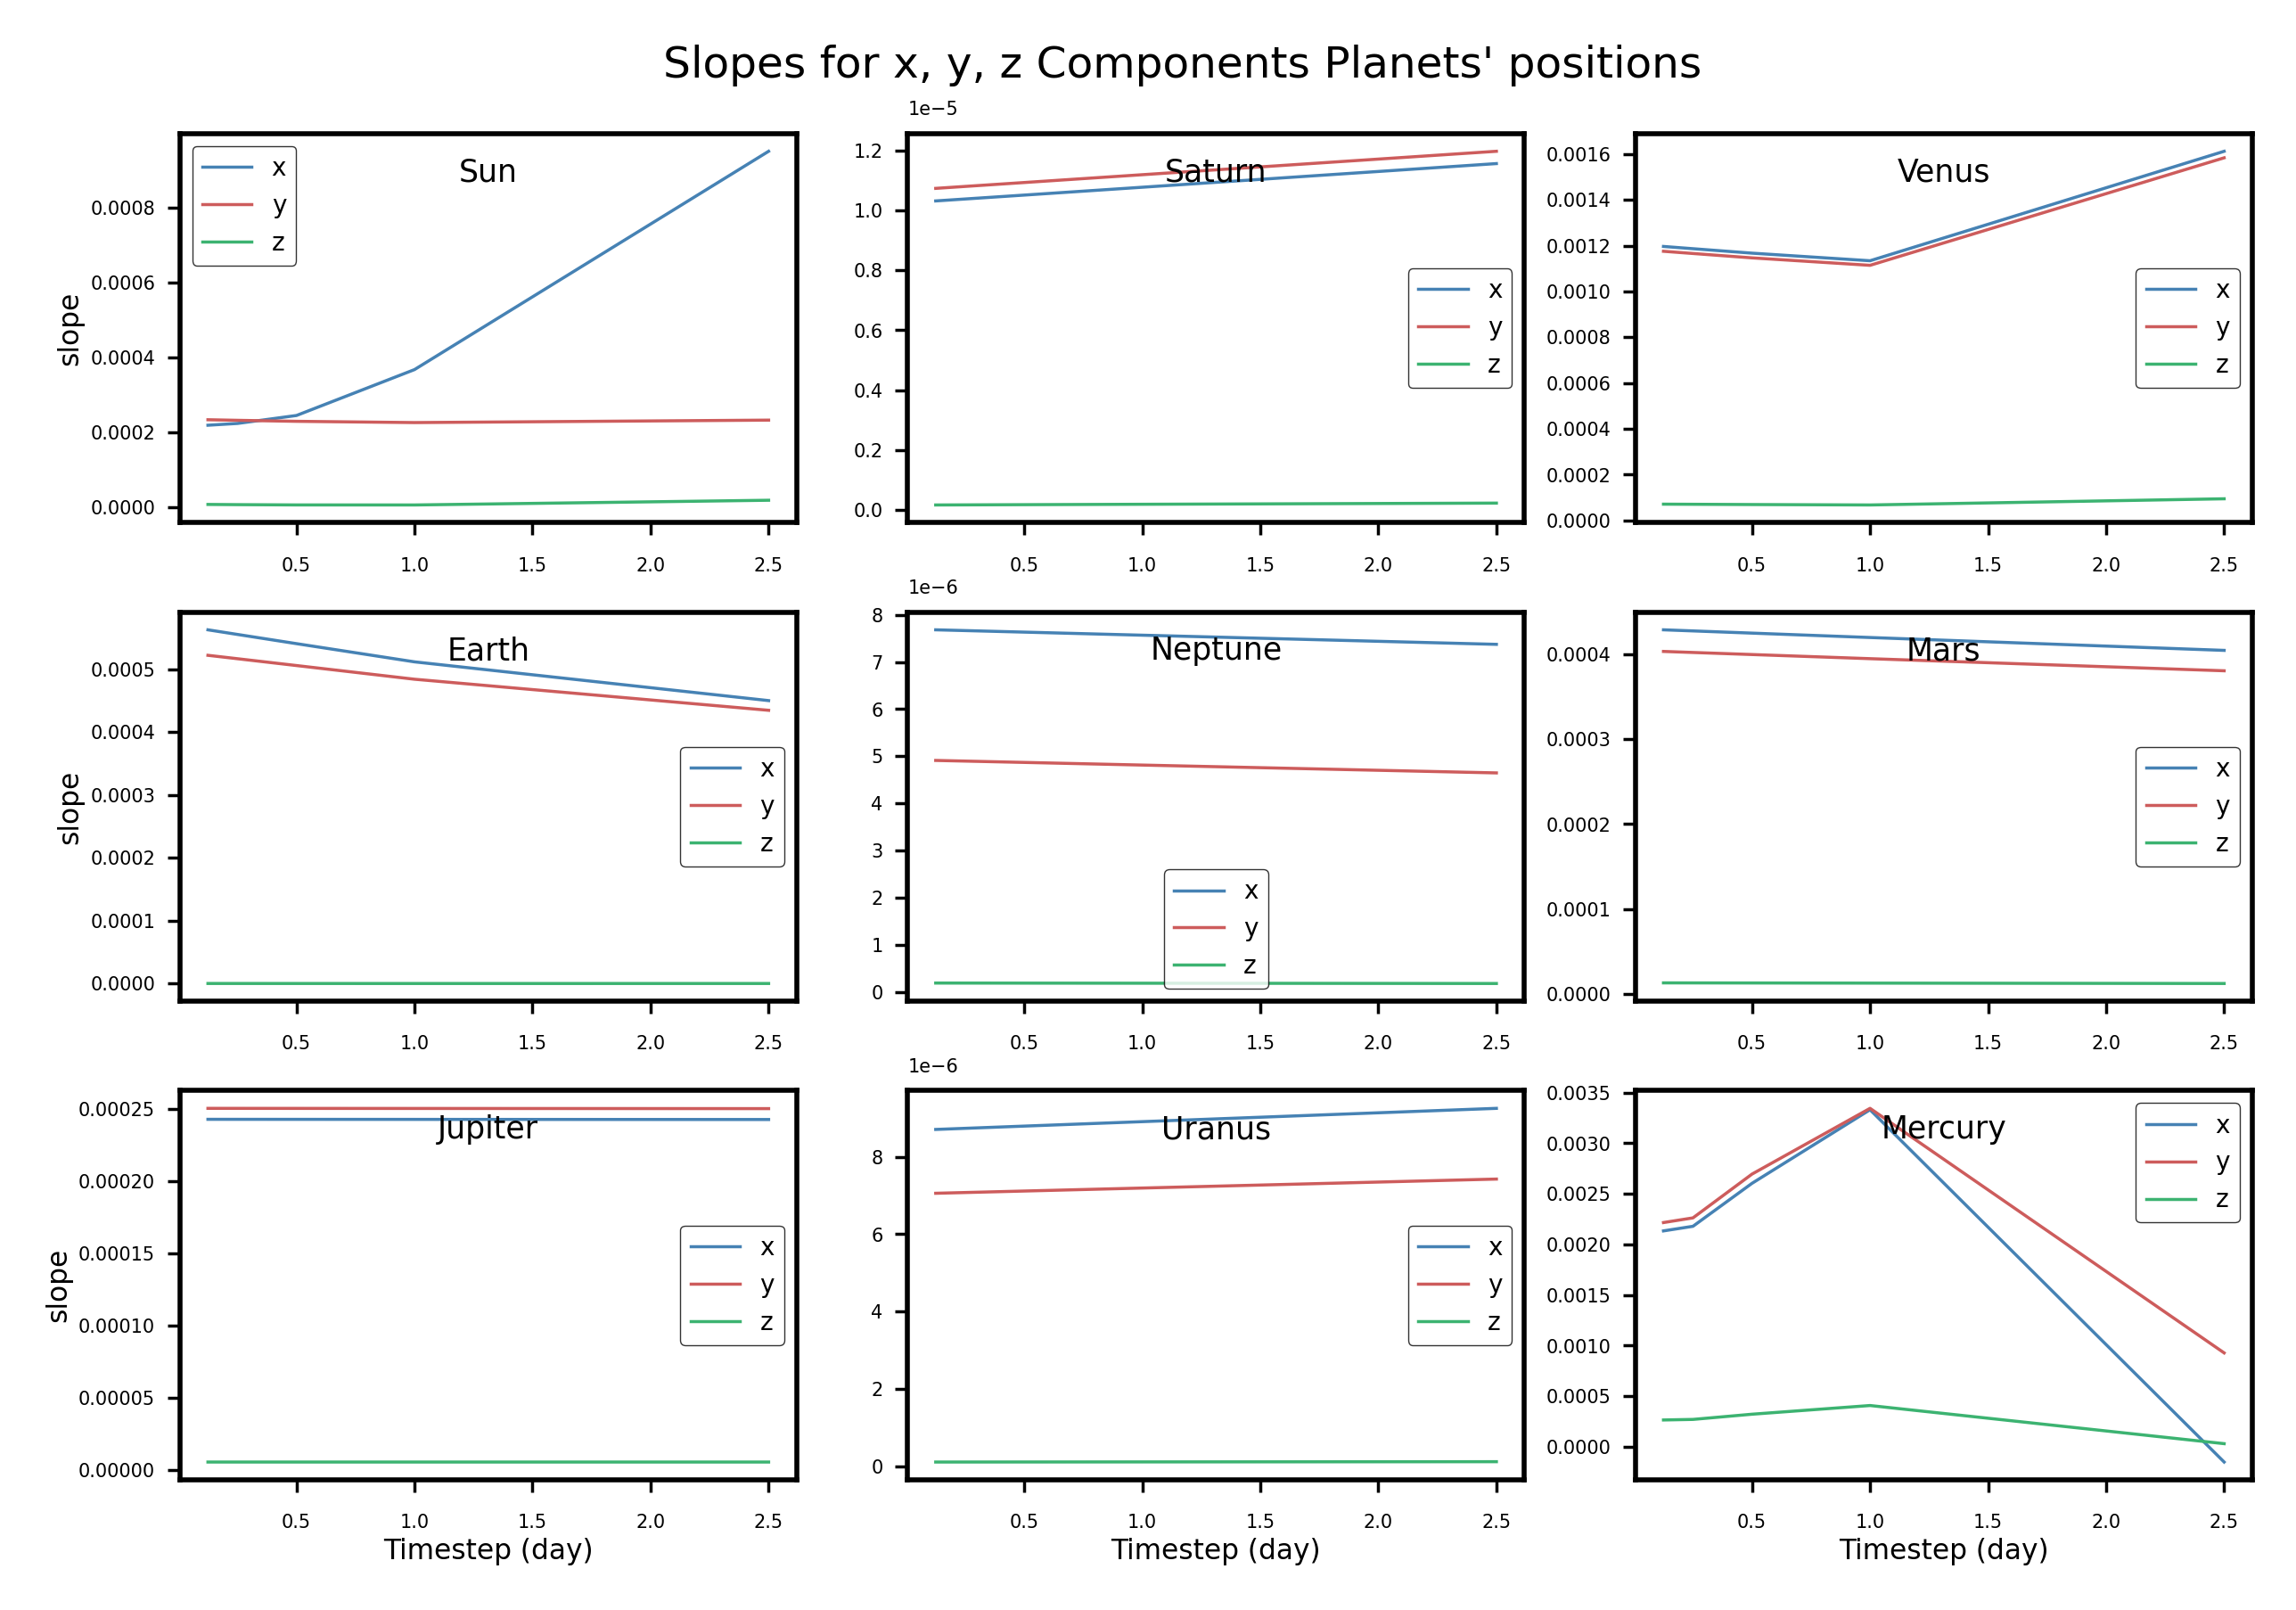

In [5]:
datasets = []
for file in files:
    df = pd.read_csv(folder + "/%s"%(file))
    datasets.append(df)
print(len(datasets))

figure, ax = plt.subplots(3, 3)
figure.set_dpi(500)
plt.ticklabel_format(useOffset=False)
i_h = [0, 1, 2, 0, 1, 2, 0, 1, 2]
i_v = [0, 0, 0, 1, 1, 1, 2, 2, 2]

for ind in range(len(bodies)):
    body = bodies[ind]
    print(body)
    
    slopes_x = []
    slopes_y = []
    slopes_z = []
    
    for dataset in datasets:
        row = list(dataset.loc[ind])
#         print(row)
        slopes_x.append(row[1])
        slopes_y.append(row[2])
        slopes_z.append(row[3])
    
    ax[i_h[ind]][i_v[ind]].plot(x_axis, slopes_x, label = 'x', linewidth = 0.5, c = "steelblue")
    ax[i_h[ind]][i_v[ind]].plot(x_axis, slopes_y, label = 'y', linewidth = 0.5, c = "indianred")
    ax[i_h[ind]][i_v[ind]].plot(x_axis, slopes_z, label = 'z', linewidth = 0.5, c = "mediumseagreen")
    leg = ax[i_h[ind]][i_v[ind]].legend(fontsize="4")
    leg.get_frame().set_linewidth(0.2)
    leg.get_frame().set_edgecolor('k')

    if i_h[ind] == 2:
        ax[i_h[ind]][i_v[ind]].set_xlabel("Timestep (day)", fontsize=4.5, labelpad=1)
    
    # ax[i_h[ind]][i_v[ind]].yaxis.offsetText.set_visible(False)

    ax[i_h[ind]][i_v[ind]].yaxis.get_offset_text().set_fontsize(3)
    ax[i_h[ind]][i_v[ind]].get_yaxis().get_major_formatter().set_useOffset(False)

    ax[i_h[ind]][i_v[ind]].tick_params('both', length=2, width=0.5)
    ax[i_h[ind]][i_v[ind]].tick_params(axis='x', labelsize=3)
    ax[i_h[ind]][i_v[ind]].tick_params(axis='y', labelsize=3, pad = 2)

    if i_v[ind] == 0:
        ax[i_h[ind]][i_v[ind]].set_ylabel("slope", fontsize=4.5, labelpad=1)
    plt.text(0.5, 0.9, body.capitalize(), horizontalalignment='center',verticalalignment='center', transform= ax[i_h[ind]][i_v[ind]].transAxes, fontsize = 5)

    ind += 1

figure.subplots_adjust(hspace=0.23)
figure.subplots_adjust(wspace=0.18)
plt.suptitle("Slopes for x, y, z Components Planets' positions", fontsize = 7, y = 0.93)
#     plt.savefig("tmp.png", dpi = 500)
plt.show()

## 2.2: Compare how Runga Kutta and Bulirsch Stoer methods evolve

In [6]:
folder = "slopes"
files_b = ["0.125_day_timestep_slopes.csv", "0.25_day_timestep_slopes.csv", "0.5_day_timestep_slopes.csv", "1_day_timestep_slopes.csv", "2.5_day_timestep_slopes.csv"]
files_r = ["0.125_day_timestep_runga_kutta_slopes.csv", "0.25_day_timestep_runga_kutta_slopes.csv", "0.5_day_timestep_runga_kutta_slopes.csv", "1_day_timestep_runga_kutta_slopes.csv", "2.5_day_timestep_runga_kutta_slopes.csv"]
x_axis = [0.125, 0.25, 0.5, 1, 2.5]
bodies = ['sun', 'earth', 'jupiter', 'saturn', 'neptune', 'uranus', 'venus', 'mars', 'mercury']

5
5


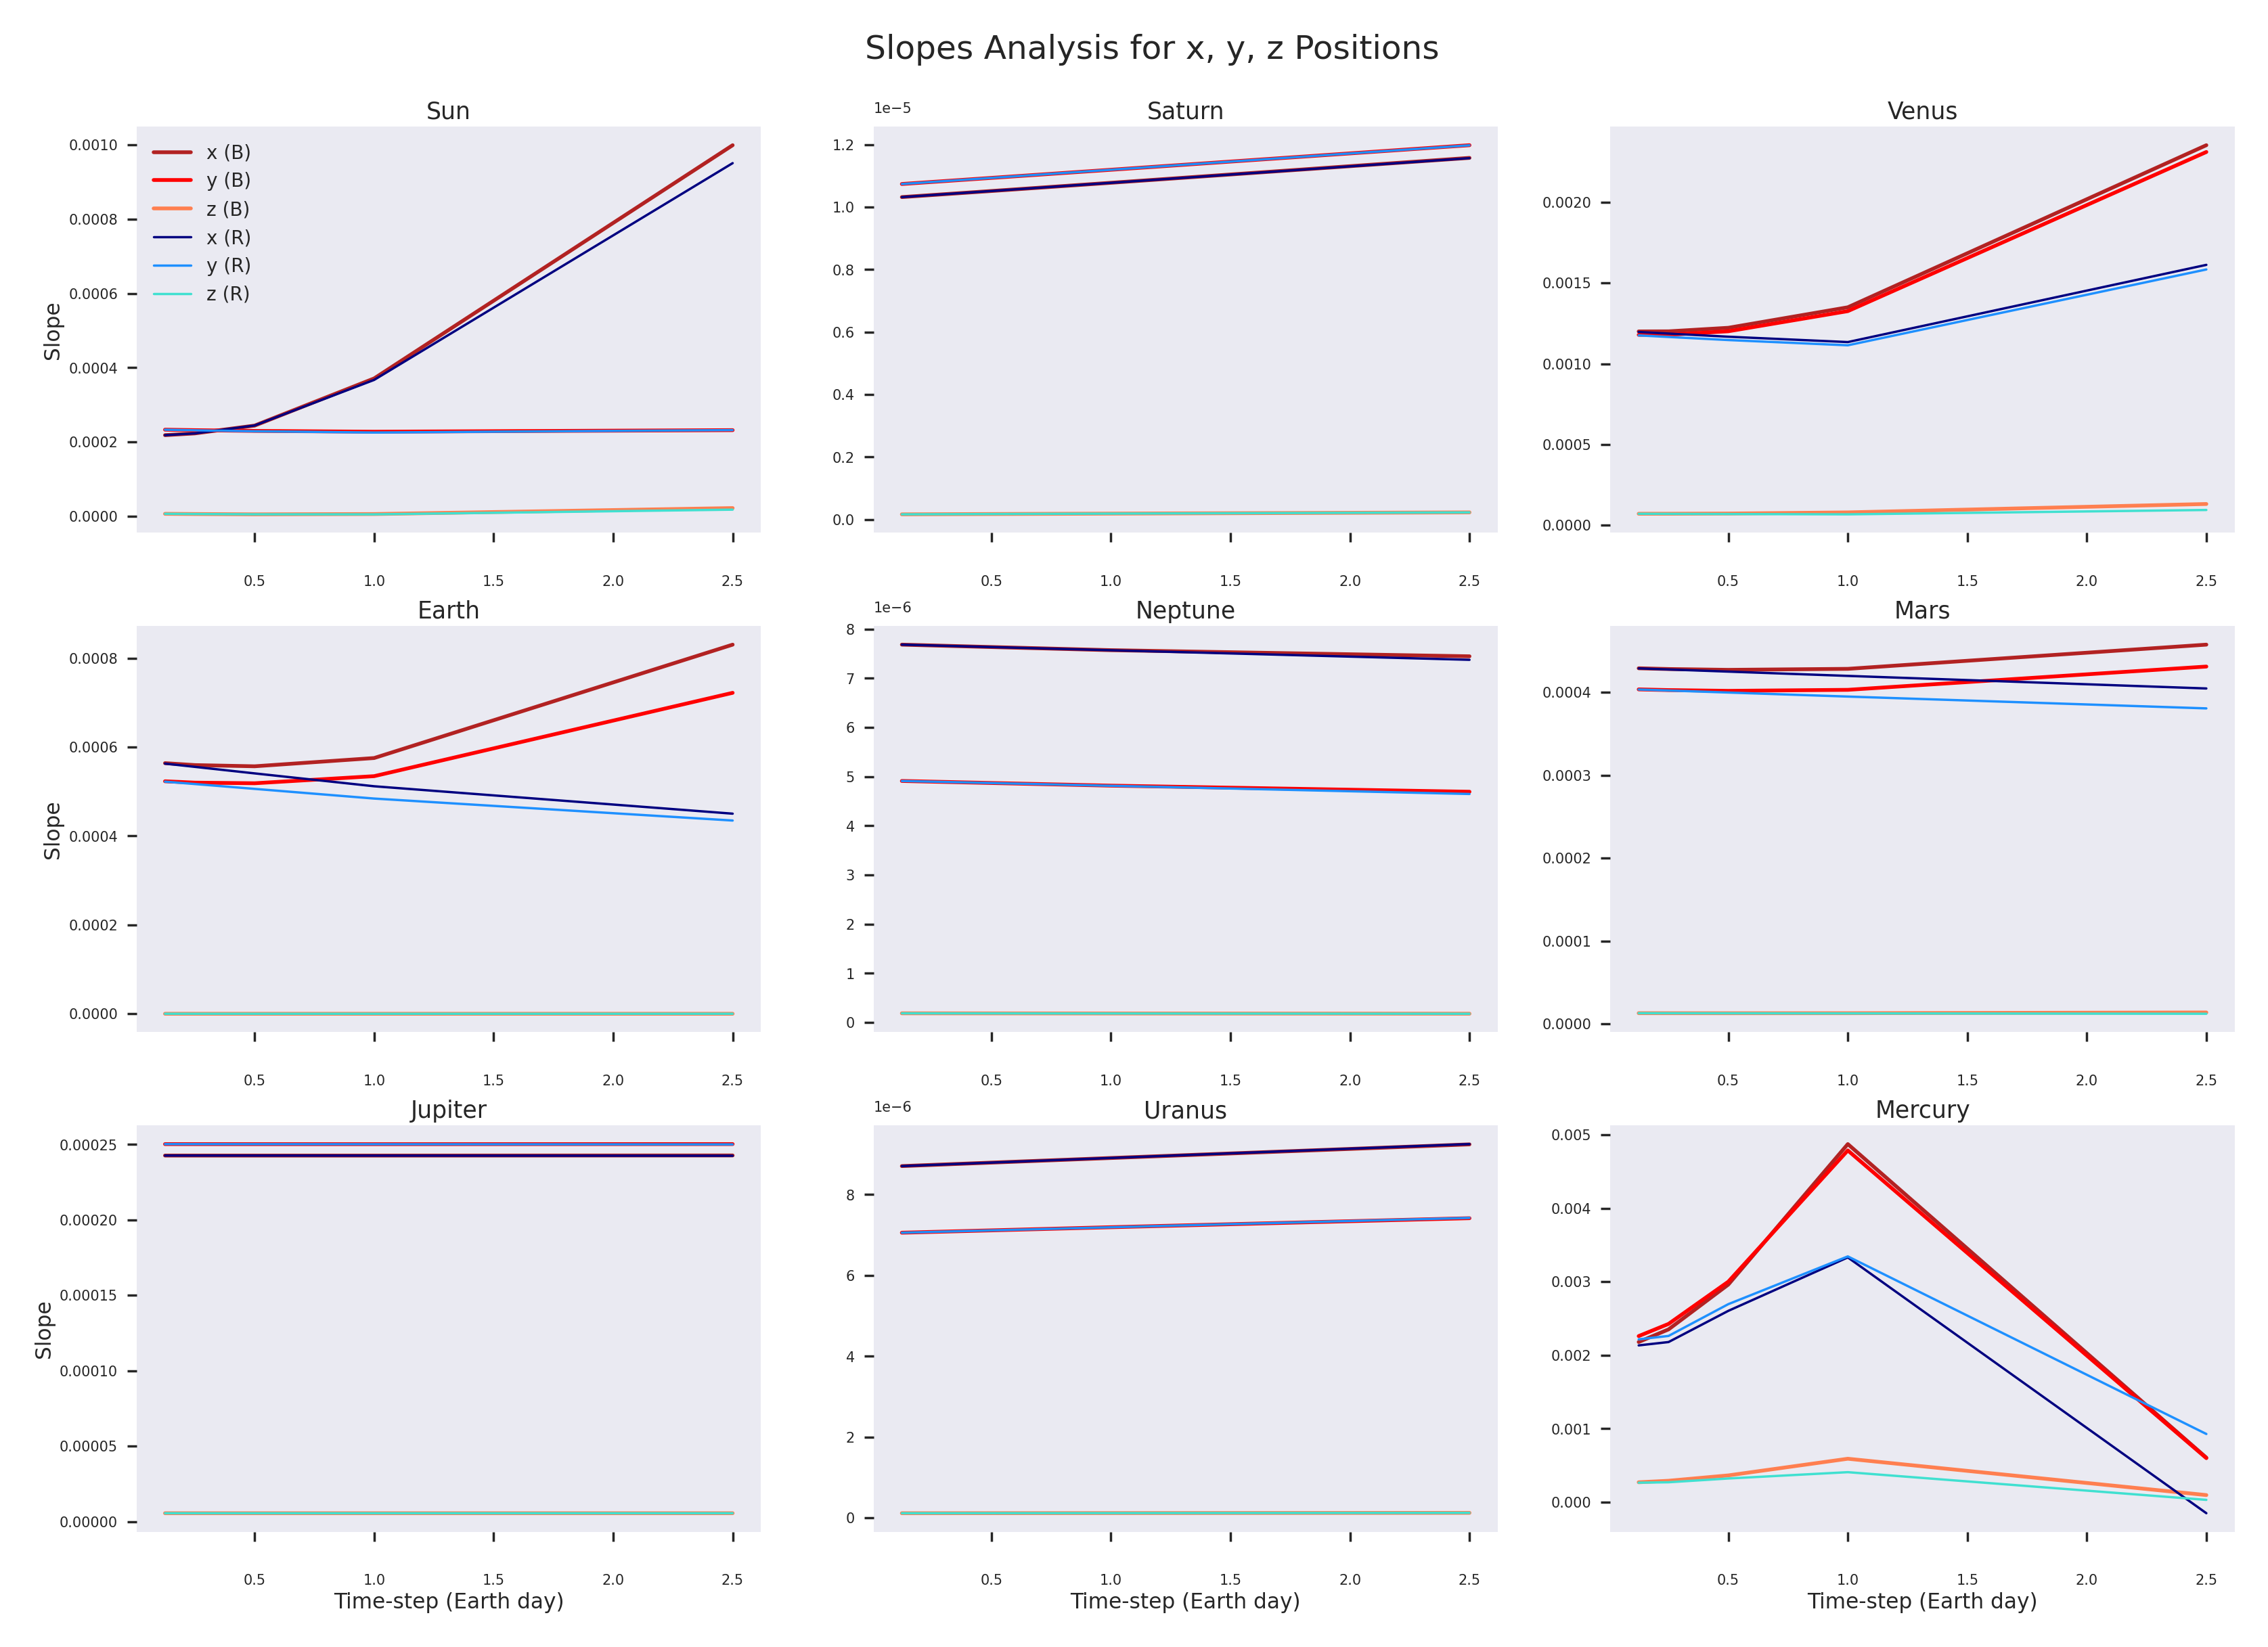

In [27]:
datasets_b = []
for file in files_b:
    df = pd.read_csv(folder + "/%s"%(file))
    datasets_b.append(df)
print(len(datasets_b))

datasets_r = []
for file in files_r:
    df = pd.read_csv(folder + "/%s"%(file))
    datasets_r.append(df)
print(len(datasets_r))
plt.style.use("seaborn")
figure, ax = plt.subplots(3, 3)
figure.set_dpi(500)
plt.ticklabel_format(useOffset=False)
i_h = [0, 1, 2, 0, 1, 2, 0, 1, 2]
i_v = [0, 0, 0, 1, 1, 1, 2, 2, 2]

for ind in range(len(bodies)):
    body = bodies[ind]
#     print(body)
    
    slopes_x_b = []
    slopes_y_b = []
    slopes_z_b = []
    
    slopes_x_r = []
    slopes_y_r = []
    slopes_z_r = []
    
    for dataset in datasets_b:
        row = list(dataset.loc[ind])
#         print(row)
        slopes_x_b.append(row[1])
        slopes_y_b.append(row[2])
        slopes_z_b.append(row[3])
    
    for dataset in datasets_r:
        row = list(dataset.loc[ind])
#         print(row)
        slopes_x_r.append(row[1])
        slopes_y_r.append(row[2])
        slopes_z_r.append(row[3])
    
    ax[i_h[ind]][i_v[ind]].plot(x_axis, slopes_x_b, label = 'x (B)', linewidth = 0.8, c = "firebrick")
    ax[i_h[ind]][i_v[ind]].plot(x_axis, slopes_y_b, label = 'y (B)', linewidth = 0.8, c = "red")
    ax[i_h[ind]][i_v[ind]].plot(x_axis, slopes_z_b, label = 'z (B)', linewidth = 0.8, c = "coral")
    
    ax[i_h[ind]][i_v[ind]].plot(x_axis, slopes_x_r, label = 'x (R)', linewidth = 0.5, c = "navy")
    ax[i_h[ind]][i_v[ind]].plot(x_axis, slopes_y_r, label = 'y (R)', linewidth = 0.5, c = "dodgerblue")
    ax[i_h[ind]][i_v[ind]].plot(x_axis, slopes_z_r, label = 'z (R)', linewidth = 0.5, c = "turquoise")
    
    if ind == 0:
        leg = ax[i_h[ind]][i_v[ind]].legend(fontsize="4")
    leg.get_frame().set_linewidth(0.2)
    leg.get_frame().set_edgecolor('k')

    if i_h[ind] == 2:
        ax[i_h[ind]][i_v[ind]].set_xlabel("Time-step (Earth day)", fontsize=4.5, labelpad=1)
    
    # ax[i_h[ind]][i_v[ind]].yaxis.offsetText.set_visible(False)

    ax[i_h[ind]][i_v[ind]].yaxis.get_offset_text().set_fontsize(3)
    ax[i_h[ind]][i_v[ind]].get_yaxis().get_major_formatter().set_useOffset(False)

    ax[i_h[ind]][i_v[ind]].tick_params('both', length=2, width=0.5)
    ax[i_h[ind]][i_v[ind]].tick_params(axis='x', labelsize=3)
    ax[i_h[ind]][i_v[ind]].tick_params(axis='y', labelsize=3, pad = 2)

    if i_v[ind] == 0:
        ax[i_h[ind]][i_v[ind]].set_ylabel("Slope", fontsize=4.5, labelpad=1)
#     plt.text(0.5, 0.9, body.capitalize(), horizontalalignment='center',verticalalignment='center', transform= ax[i_h[ind]][i_v[ind]].transAxes, fontsize = 5)
    
    ax[i_h[ind]][i_v[ind]].set_title(body.capitalize(), y = 0.95, fontsize = 5)
    ax[i_h[ind]][i_v[ind]].grid(False)

    ind += 1

figure.subplots_adjust(hspace=0.23)
figure.subplots_adjust(wspace=0.18)
plt.suptitle("Slopes Analysis for x, y, z Positions", fontsize = 7, y = 0.93)
plt.savefig("slope_analysis.png", dpi = 500)
plt.show()

## 2: compare for fixed sun or not

In [5]:
folder = "slopes"
files = ["1_day_timestep_slopes.csv", "1_day_timestep_fix_sun_slopes.csv"]
x_axis = ["no_fixed_sun", "fixed_sun"]
bodies = ['sun', 'earth', 'jupiter', 'saturn', 'neptune', 'uranus', 'venus', 'mars', 'mercury']

2
sun
['sun', 0.00037105893485297017, 0.0002276439177742793, 5.893310304142763e-06]
['sun', 5.3693418724061076e-05, 4.47955245802613e-05, 4.854401154575939e-06]
earth
['earth', 0.0005753212536579742, 0.0005345423870279181, 2.67749602127092e-08]
['earth', 0.0008146577166023755, 0.0013080443456617752, -1.590048455100831e-08]
jupiter
['jupiter', 0.00024263832076418593, 0.00025020287867590183, 5.575203180163033e-06]
['jupiter', 0.0004334174573659486, 0.0004462677792473908, 9.950439643717896e-06]
saturn
['saturn', 1.0775756953464227e-05, 1.1192143078482424e-05, 1.9132884206791226e-07]
['saturn', 0.00014186627716767394, 0.00014332268221037224, 5.92294787641168e-06]
neptune
['neptune', 7.571556600185516e-06, 4.816333826343659e-06, 1.827252866031382e-07]
['neptune', 2.1686195146211584e-05, 1.5090136687578632e-05, 5.805265290083239e-07]
uranus
['uranus', 8.906108297680581e-06, 7.193345517014085e-06, 1.2007628777357672e-07]
['uranus', 3.053038353401708e-05, 2.320422321589859e-05, 3.3711211691161

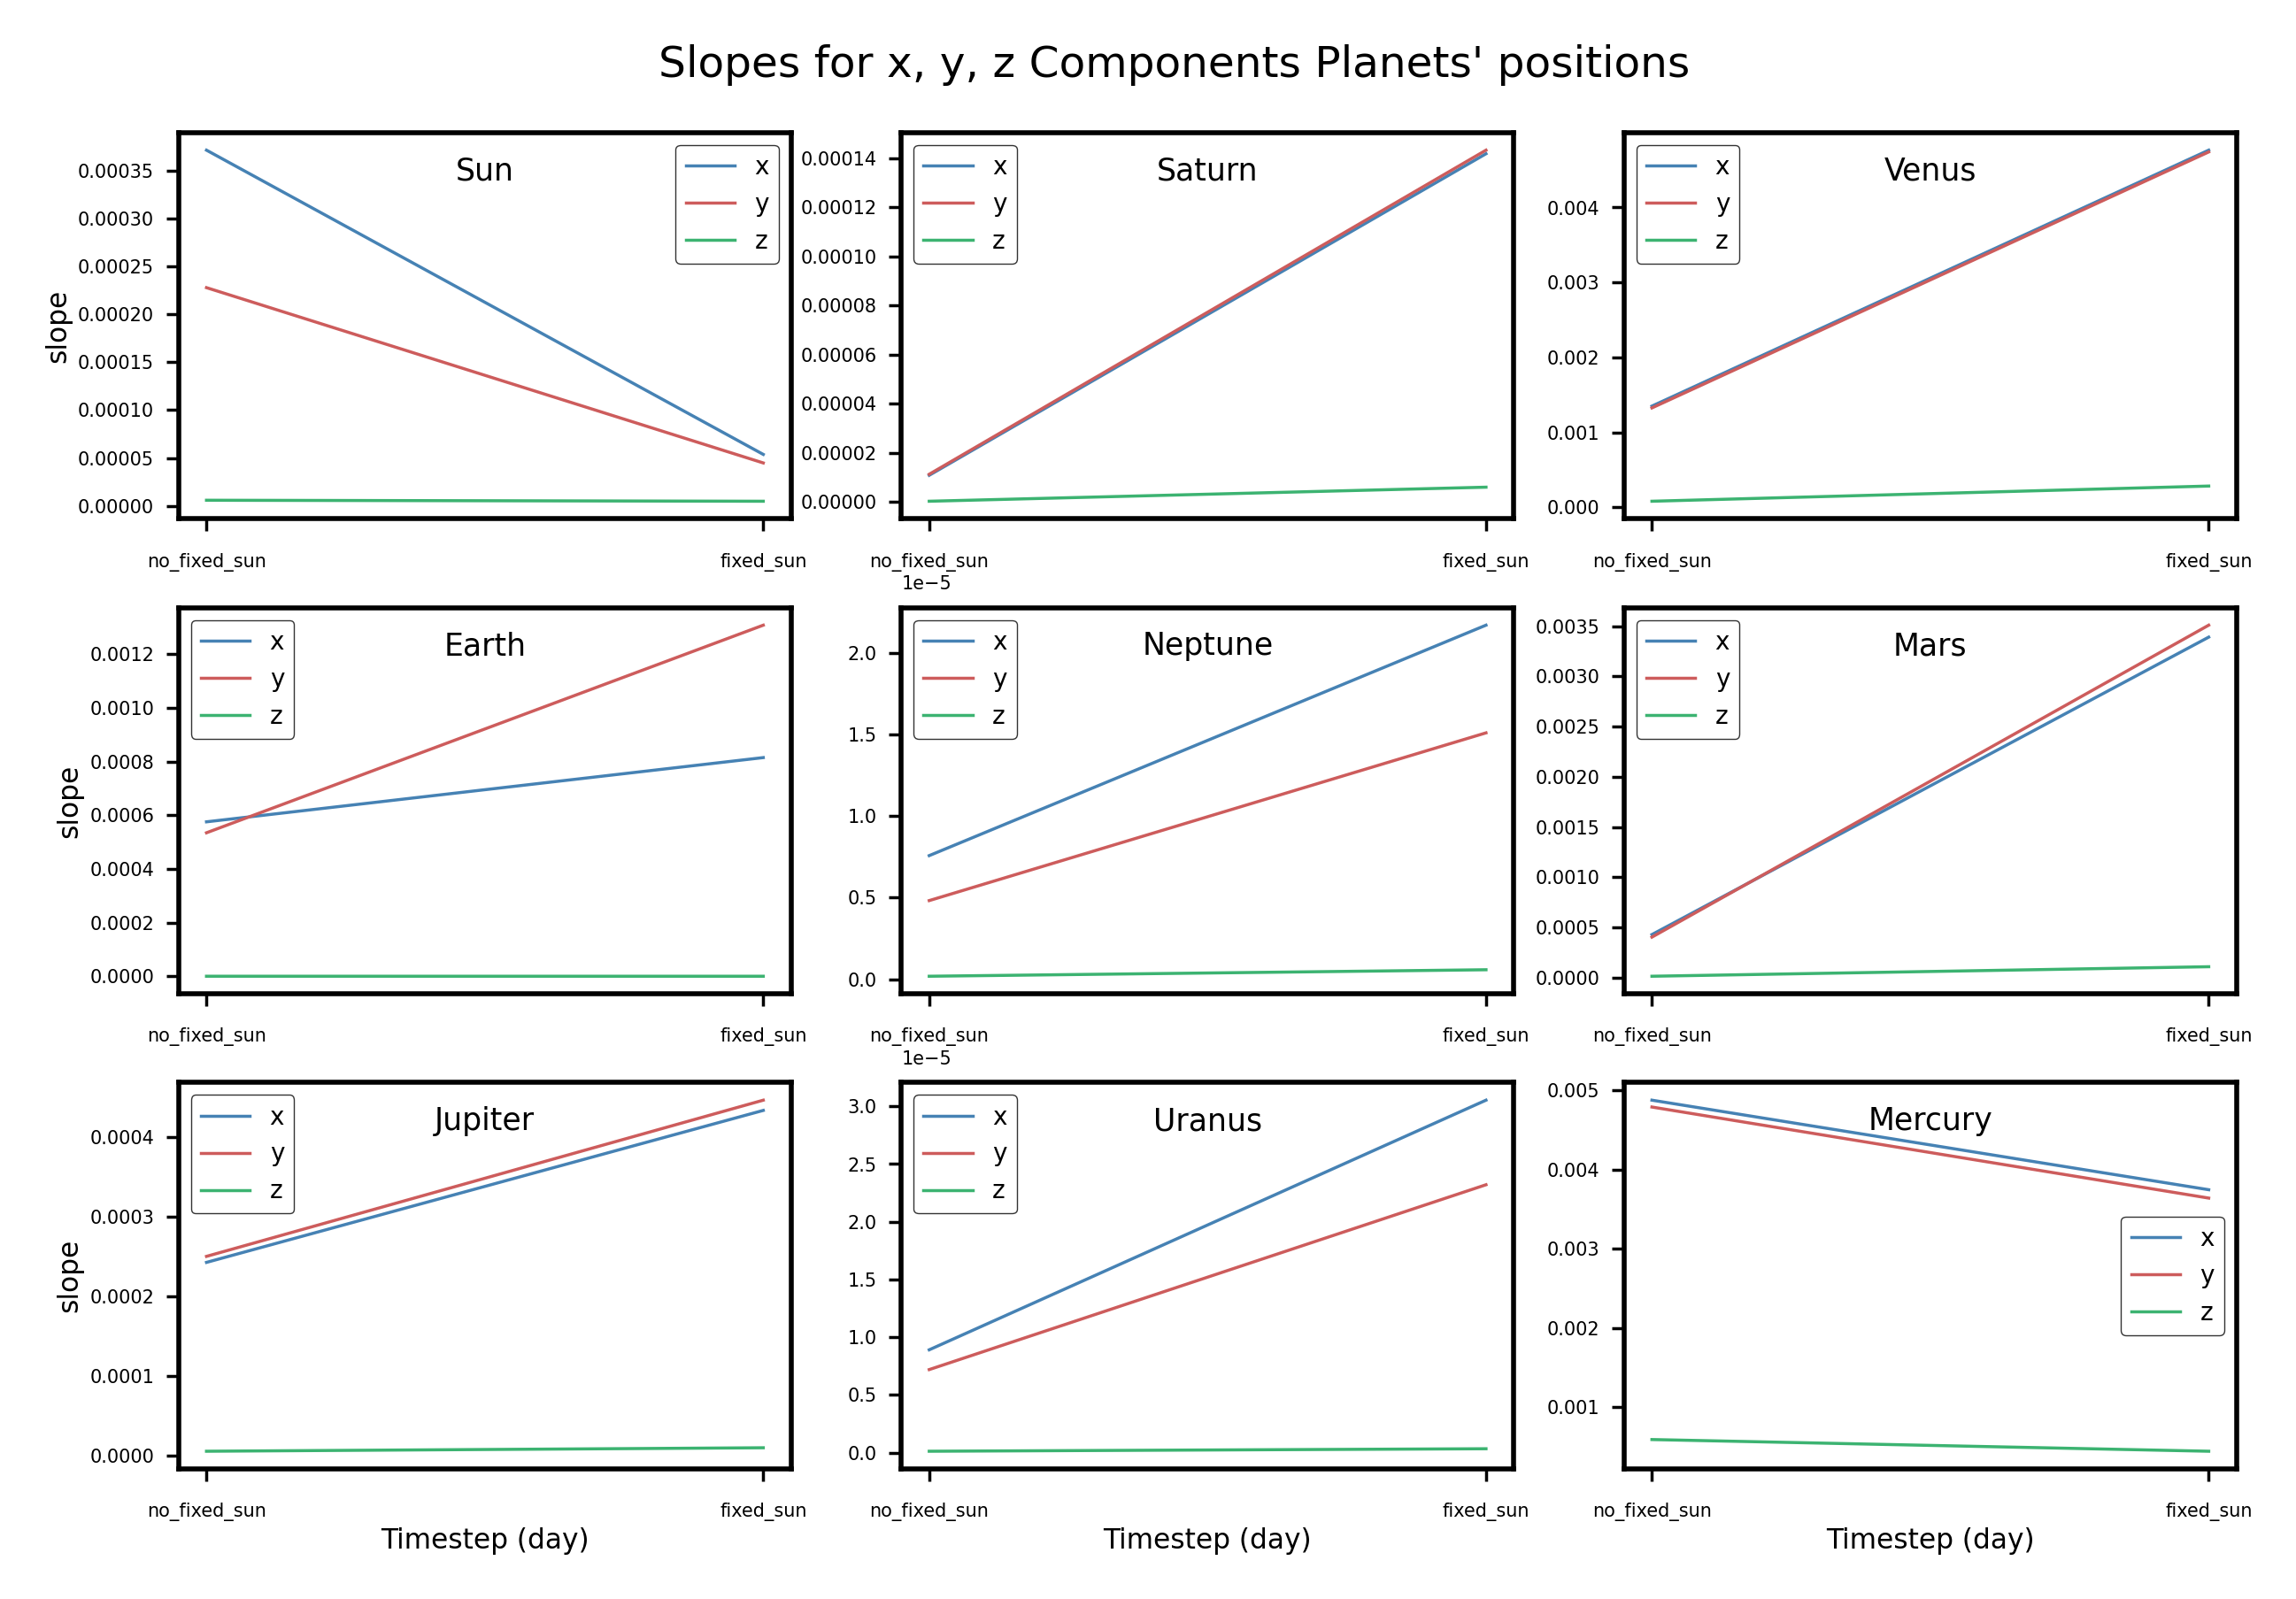

In [6]:
datasets = []
for file in files:
    df = pd.read_csv(folder + "/%s"%(file))
    datasets.append(df)
print(len(datasets))

figure, ax = plt.subplots(3, 3)
figure.set_dpi(500)
plt.ticklabel_format(useOffset=False)
i_h = [0, 1, 2, 0, 1, 2, 0, 1, 2]
i_v = [0, 0, 0, 1, 1, 1, 2, 2, 2]

for ind in range(len(bodies)):
    body = bodies[ind]
    print(body)
    
    slopes_x = []
    slopes_y = []
    slopes_z = []
    
    for dataset in datasets:
        row = list(dataset.loc[ind])
        print(row)
        slopes_x.append(row[1])
        slopes_y.append(row[2])
        slopes_z.append(row[3])
    
    ax[i_h[ind]][i_v[ind]].plot(x_axis, slopes_x, label = 'x', linewidth = 0.5, c = "steelblue")
    ax[i_h[ind]][i_v[ind]].plot(x_axis, slopes_y, label = 'y', linewidth = 0.5, c = "indianred")
    ax[i_h[ind]][i_v[ind]].plot(x_axis, slopes_z, label = 'z', linewidth = 0.5, c = "mediumseagreen")
    leg = ax[i_h[ind]][i_v[ind]].legend(fontsize="4")
    leg.get_frame().set_linewidth(0.2)
    leg.get_frame().set_edgecolor('k')

    if i_h[ind] == 2:
        ax[i_h[ind]][i_v[ind]].set_xlabel("Timestep (day)", fontsize=4.5, labelpad=1)
    
    # ax[i_h[ind]][i_v[ind]].yaxis.offsetText.set_visible(False)

    ax[i_h[ind]][i_v[ind]].yaxis.get_offset_text().set_fontsize(3)
    ax[i_h[ind]][i_v[ind]].get_yaxis().get_major_formatter().set_useOffset(False)

    ax[i_h[ind]][i_v[ind]].tick_params('both', length=2, width=0.5)
    ax[i_h[ind]][i_v[ind]].tick_params(axis='x', labelsize=3)
    ax[i_h[ind]][i_v[ind]].tick_params(axis='y', labelsize=3, pad = 2)

    if i_v[ind] == 0:
        ax[i_h[ind]][i_v[ind]].set_ylabel("slope", fontsize=4.5, labelpad=1)
    plt.text(0.5, 0.9, body.capitalize(), horizontalalignment='center',verticalalignment='center', transform= ax[i_h[ind]][i_v[ind]].transAxes, fontsize = 5)

    ind += 1

figure.subplots_adjust(hspace=0.23)
figure.subplots_adjust(wspace=0.18)
plt.suptitle("Slopes for x, y, z Components Planets' positions", fontsize = 7, y = 0.93)
#     plt.savefig("tmp.png", dpi = 500)
plt.show()

## 3: Compare Runga Kutta and Burlisch stoer

In [9]:
folder = "slopes"
files = ["0.25_day_timestep_slopes.csv", "1_day_timestep_runga_kutta_slopes.csv"]
x_axis = ["Bulirsch-Stoer", "Runga-Kugta"]
bodies = ['sun', 'earth', 'jupiter', 'saturn', 'neptune', 'uranus', 'venus', 'mars', 'mercury']

2
sun
['sun', 0.00022304301626872232, 0.00023174658502523834, 5.933032448811656e-06]
['sun', 0.0003670984290504353, 0.0002254152105220859, 5.109407285773085e-06]
earth
['earth', 0.0005594429656600973, 0.0005199590550308959, 6.60233353461674e-08]
['earth', 0.0005118183256630431, 0.0004841647552845199, 3.0868186619775723e-08]
jupiter
['jupiter', 0.00024265138896179371, 0.0002502306206427351, 5.575265037652746e-06]
['jupiter', 0.0002426061140591292, 0.0002501694848449094, 5.574330482128951e-06]
saturn
['saturn', 1.03828093696795e-05, 1.0801958391802658e-05, 1.7136137101865973e-07]
['saturn', 1.0774775279332666e-05, 1.119308905663006e-05, 1.910557670168791e-07]
neptune
['neptune', 7.66786062380774e-06, 4.897670117592111e-06, 1.855659427946561e-07]
['neptune', 7.5701131425341705e-06, 4.8134220419905705e-06, 1.8251023078977926e-07]
uranus
['uranus', 8.734735529886428e-06, 7.076852007443968e-06, 1.1705656285251181e-07]
['uranus', 8.907083507062926e-06, 7.192657282797406e-06, 1.197894665956598

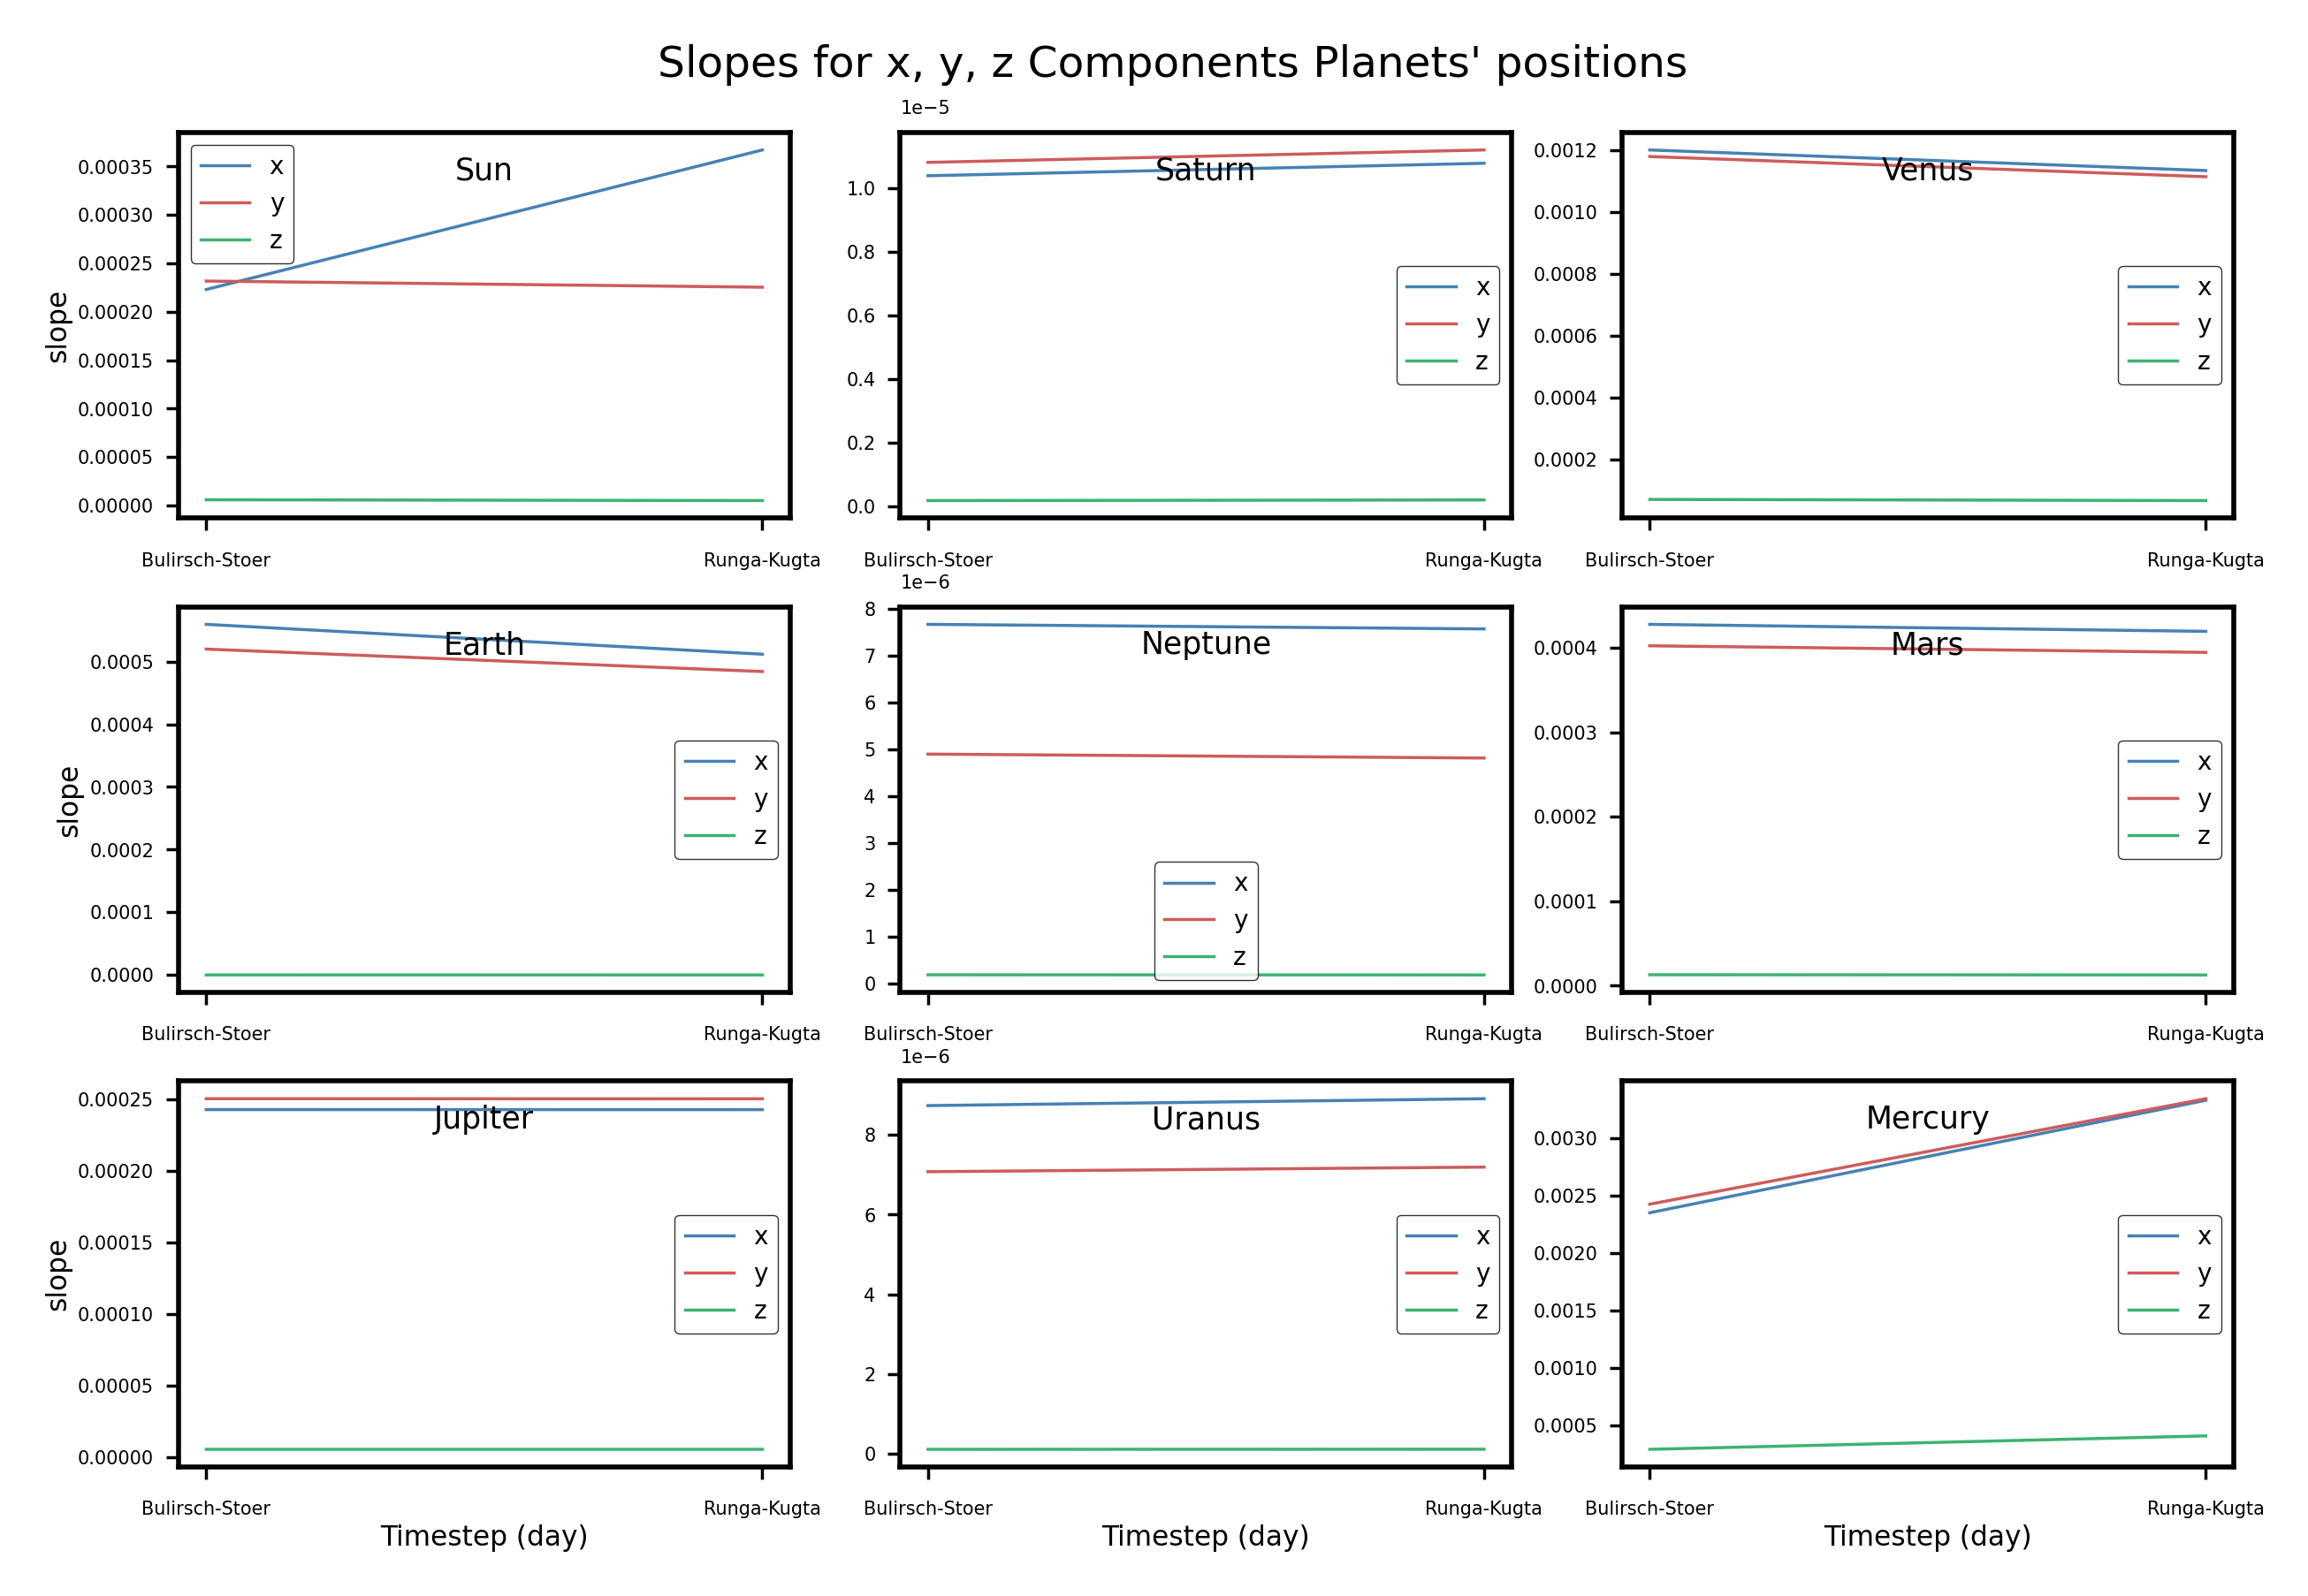

In [10]:
datasets = []
for file in files:
    df = pd.read_csv(folder + "/%s"%(file))
    datasets.append(df)
print(len(datasets))

figure, ax = plt.subplots(3, 3)
figure.set_dpi(500)
plt.ticklabel_format(useOffset=False)
i_h = [0, 1, 2, 0, 1, 2, 0, 1, 2]
i_v = [0, 0, 0, 1, 1, 1, 2, 2, 2]

for ind in range(len(bodies)):
    body = bodies[ind]
    print(body)
    
    slopes_x = []
    slopes_y = []
    slopes_z = []
    
    for dataset in datasets:
        row = list(dataset.loc[ind])
        print(row)
        slopes_x.append(row[1])
        slopes_y.append(row[2])
        slopes_z.append(row[3])
    
    ax[i_h[ind]][i_v[ind]].plot(x_axis, slopes_x, label = 'x', linewidth = 0.5, c = "steelblue")
    ax[i_h[ind]][i_v[ind]].plot(x_axis, slopes_y, label = 'y', linewidth = 0.5, c = "indianred")
    ax[i_h[ind]][i_v[ind]].plot(x_axis, slopes_z, label = 'z', linewidth = 0.5, c = "mediumseagreen")
    leg = ax[i_h[ind]][i_v[ind]].legend(fontsize="4")
    leg.get_frame().set_linewidth(0.2)
    leg.get_frame().set_edgecolor('k')

    if i_h[ind] == 2:
        ax[i_h[ind]][i_v[ind]].set_xlabel("Timestep (day)", fontsize=4.5, labelpad=1)
    
    # ax[i_h[ind]][i_v[ind]].yaxis.offsetText.set_visible(False)

    ax[i_h[ind]][i_v[ind]].yaxis.get_offset_text().set_fontsize(3)
    ax[i_h[ind]][i_v[ind]].get_yaxis().get_major_formatter().set_useOffset(False)

    ax[i_h[ind]][i_v[ind]].tick_params('both', length=2, width=0.5)
    ax[i_h[ind]][i_v[ind]].tick_params(axis='x', labelsize=3)
    ax[i_h[ind]][i_v[ind]].tick_params(axis='y', labelsize=3, pad = 2)

    if i_v[ind] == 0:
        ax[i_h[ind]][i_v[ind]].set_ylabel("slope", fontsize=4.5, labelpad=1)
    plt.text(0.5, 0.9, body.capitalize(), horizontalalignment='center',verticalalignment='center', transform= ax[i_h[ind]][i_v[ind]].transAxes, fontsize = 5)

    ind += 1

figure.subplots_adjust(hspace=0.23)
figure.subplots_adjust(wspace=0.18)
plt.suptitle("Slopes for x, y, z Components Planets' positions", fontsize = 7, y = 0.93)
#     plt.savefig("tmp.png", dpi = 500)
plt.show()